# Classify
Supervised learning example: classify species in Fisher's iris dataset.

In [1]:
%autosave 0

from tools import *
from learn import Classify
from plot import Plot

plot = Plot(figsize=(5, 3))

Autosave disabled


## get data
Normalize columns to similar scales so that coefficients are easier to understand.

In [2]:
clues = irisdata()
answers = clues.pop('species')
answers

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [3]:
clues = zscores(clues)
clues

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


## train a Classifier
Choose some random rows to reduce overfitting.

In [4]:
train = afew(clues, 70)
classy = Classify(train, answers[train.index])
classy

Classify(
    model=LogisticRegressionCV, 
    Cs=10 
    class_weight=None 
    cv=None 
    dual=False 
    fit_intercept=True 
    intercept_scaling=1.0 
    l1_ratios=None 
    max_iter=100 
    multi_class=auto 
    n_jobs=None 
    penalty=l2 
    random_state=None 
    refit=True 
    scoring=None 
    solver=lbfgs 
    tol=0.0001 
    verbose=0)

In [5]:
classy.cats

['setosa', 'versicolor', 'virginica']

In [6]:
classy.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [7]:
classy.coefs

,sepal_length,sepal_width,petal_length,petal_width
setosa,-1.735831,1.800761,-3.727837,-3.321552
versicolor,1.363524,-0.097890,-1.718562,-1.175457
virginica,0.372307,-1.702871,5.446398,4.497009


In [8]:
classy.model

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

## assign classes
Call with new data to assign each row a class.

In [9]:
classes = classy(clues)
classes

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

## assign probabilities
Only some models can do this.

In [10]:
probs = classy(clues, probs=True)
probs

,setosa,versicolor,virginica
0,9.979095e-01,0.002091,1.571075e-14
1,9.913267e-01,0.008673,5.220246e-13
2,9.984569e-01,0.001543,3.765054e-14
3,9.979409e-01,0.002059,1.842833e-13
4,9.990688e-01,0.000931,5.458033e-15
...,...,...,...
145,2.263150e-08,0.004665,9.953354e-01
146,1.896922e-07,0.019947,9.800528e-01
147,7.936076e-07,0.033249,9.667505e-01
148,7.118730e-07,0.004965,9.950346e-01


## check results
How closely do the classes agree with reality?

species,setosa,versicolor,virginica
class,,,
setosa,50,0,0
versicolor,0,45,0
virginica,0,5,50


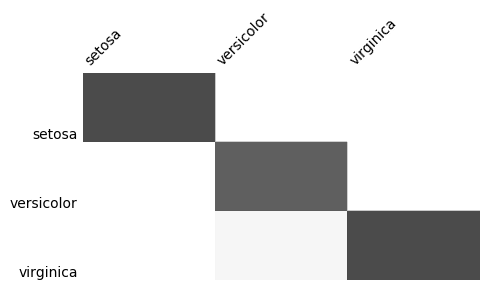

In [11]:
confusion = crosstab(classes, answers)
plot.heat(confusion, cmap='Greys')
confusion

## classify with different parameters

species,setosa,versicolor,virginica
class,,,
setosa,49,0,0
versicolor,1,43,7
virginica,0,7,43


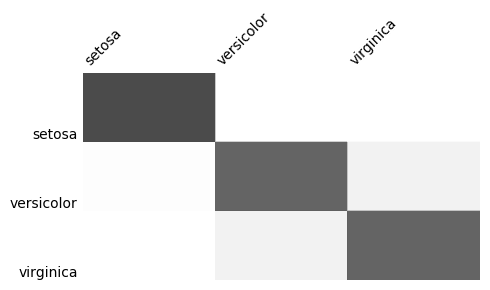

In [12]:
params = dict()
params['class_weight'] = 'balanced'
params['penalty'] = 'l1'
params['solver'] = 'liblinear'

train = afew(clues, 50)
classy = Classify(train, answers[train.index], **params)
confusion = crosstab(classy(clues), answers)
plot.heat(confusion, cmap='Greys')
confusion

## classify with another model

species,setosa,versicolor,virginica
class,,,
setosa,46,0,0
versicolor,4,40,5
virginica,0,10,45


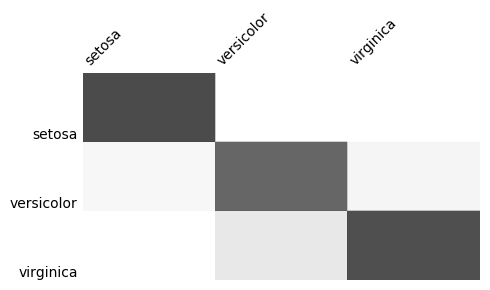

In [13]:
name = 'PassiveAggressiveClassifier'
train = afew(clues, 50)
classy = Classify(train, answers[train.index], model=name)
confusion = crosstab(classy(clues), answers)
plot.heat(confusion, cmap='Greys')
confusion

## help

In [14]:
help(Classify)

Help on class Classify in module learn:

class Classify(builtins.object)
 |  Classify(clues, answers, model='LogisticRegressionCV', **kwargs)
 |  
 |  Train, use, and re-use an automatic classifier.
 |  Input training data, then call with new data to return a Series.
 |  
 |  Constructor inputs:
 |      clues       DataFrame: Training data with numeric columns.
 |      answers     Iterable: Known classes. Must align with clues.
 |      model       optional str: Name of an sklearn.linear_model.
 |      **kwargs    will be passed to the chosen model.
 |  
 |  Call inputs:
 |      clues       DataFrame: Same columns as training 'clues'.
 |      probs       bool: Return a DataFrame of class probabilties?
 |  
 |  Note: Some models cannot return class probabilities.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, clues, probs=False)
 |      Call self as a function.
 |  
 |  __init__(self, clues, answers, model='LogisticRegressionCV', **kwargs)
 |      Initialize self.  See help(type(